# Mapear los valores de accesibilidad en hexágonos
Una de las maneras de agrupar la información para encontrar patrones es a partir del uso de hexágonos, de esta manera se tiene una unidad definida de la misma manera para todo el espacio y se pueden hacer comparaciones entre diferentes partes geográficas.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [117]:
import osmnx as ox
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import igraph as ig
import numpy as np
from shapely.geometry import Polygon
import src 
import networkx as nx
%matplotlib inline

In [4]:
ox.config(data_folder='../data',cache_folder='../data/raw', use_cache=True,log_console=True)

In [5]:
city = 'GDL'
#Área Metropolitana Guadalajara
mpos = gpd.read_file('../data/external/mex_admbnda_adm2_govmex/mex_admbnda_adm2_govmex.shp')
amg = mpos[mpos['ADM2_ES'].isin(['Guadalajara','Zapopan','El Salto','Ixtlahuacon de los Membrillos','Tlajomulco de Zueiga','Tlaquepaque','Tonale','Juanacatlun'])]
amg_boundary = amg.dissolve(by='ADM0_ES')
amg_boundary = amg_boundary[['geometry','ADM2_PCODE']] # keep only 'geometry' 

In [6]:
polygon = amg_boundary['geometry'][0]

In [11]:
nodes = gpd.read_file("../data/processed/GDL_nodes_distance.geojson")
nodes['X'] = nodes.geometry.x
nodes['Y'] = nodes.geometry.y

In [ ]:
src.

In [118]:
hex_bins = src.hex_grid(gdf,500)

AttributeError: module 'src' has no attribute 'hex_grid'

In [114]:
from matplotlib.patches import RegularPolygon


xmin,ymin,xmax,ymax = amg_boundary.total_bounds # lat-long of 2 corners

#East-West extent
EW = src.haversine((xmin,ymin),(xmax,ymin))
# North-South extent 
NS = src.haversine((xmax,ymin),(xmax,ymax))

# diamter of each hexagon in the grid = 900 metres
d_m = 2000
# horizontal width of hexagon = w = d* sin(60)
w = d_m*np.sin(np.pi/3)
# Approximate number of hexagons per row = EW/w 
n_cols = int(EW/w)+1
# Approximate number of hexagons per column = NS/d
n_rows = int(NS/d_m)+1

w = (xmax-xmin)/n_cols # width of hexagon
d = w/np.sin(np.pi/3) #diameter of hexagon

array_of_hexes = []
for rows in range(0,n_rows+20):
    hcoord = np.arange(xmin,xmax,w) + (rows%2)*w/2
    vcoord = [ymax- rows*d*0.75]*n_cols
    for x, y in zip(hcoord, vcoord):#, colors):
        hexes = RegularPolygon((x, y), numVertices=6, radius=d/2, alpha=0.2, edgecolor='k')
        verts = hexes.get_path().vertices
        trans = hexes.get_patch_transform()
        points = trans.transform(verts)
        array_of_hexes.append(Polygon(points))
        
hex_grid = gpd.GeoDataFrame({'geometry':array_of_hexes},crs=amg_boundary.crs)
TO_hex = gpd.overlay(hex_grid,amg_boundary)
TO_hex = gpd.GeoDataFrame(TO_hex,geometry='geometry')

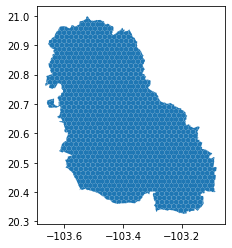

In [115]:
TO_hex.plot()